In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (15, 10)

In [12]:
alpha = 0.95
N = 100
sample = np.random.sample(size=100)

In [33]:
def f1(row):
    n = len(row)
    est = np.min(row)
    return (n+1)*est / (1 + np.sqrt(n/((n+2)*(1-alpha)))), (n+1)*est / (1 - np.sqrt(n/((n+2)*(1-alpha))))

def f2(row):
    n = len(row)
    est = np.mean(row)
    return 2*est / (1 + 1/np.sqrt(3*n*(1-alpha))), 2*est / (1 - 1/np.sqrt(3*n*(1-alpha)))

def f3(row):
    n = len(row)
    est = np.max(row)
    return (n+1)*est / (1 + np.sqrt(1/(n*(n+2)*(1-alpha)))) / n, \
            (n+1)*est / (1 - np.sqrt(1/(n*(n+2)*(1-alpha)))) / n

In [16]:
bounds1, bounds2, bounds3 = [], [], []
for n in range(1,N):
    bounds1.append(f1(sample[:n]))
    bounds2.append(f2(sample[:n]))
    bounds3.append(f3(sample[:n]))
bounds1, bounds2, bounds3 = np.array(bounds1).transpose(), np.array(bounds2).transpose(), np.array(bounds3).transpose()

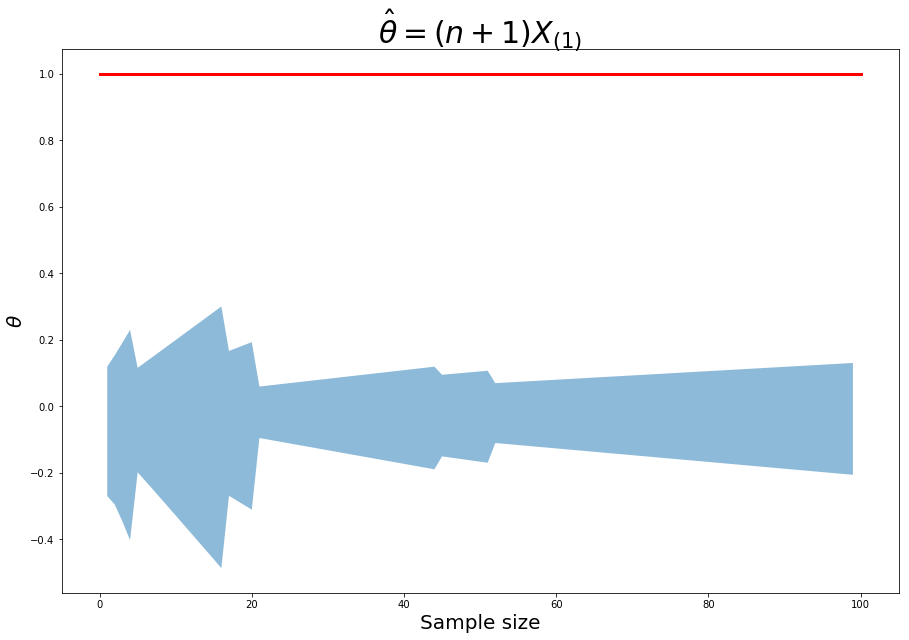

In [30]:
plt.fill_between(range(1, N), bounds1[0], bounds1[1], alpha='0.5')
plt.plot([0, N], [1, 1], linewidth=3., color='r')
plt.title(r'$\hat{\theta} = (n+1)X_{(1)}$', fontsize=30)
plt.xlabel(r'Sample size', fontsize=20)
plt.ylabel(r'$\theta$', fontsize=20)
plt.show()

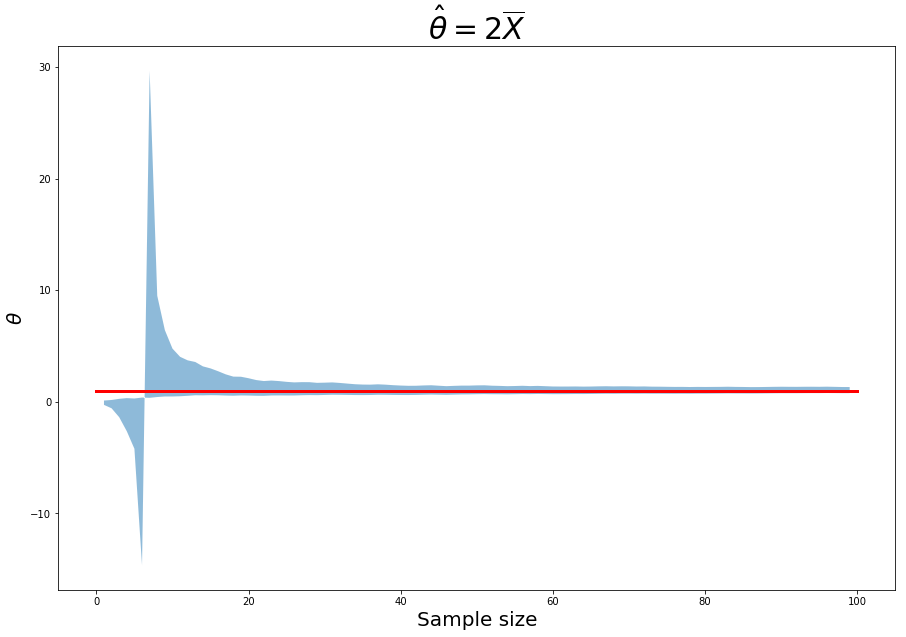

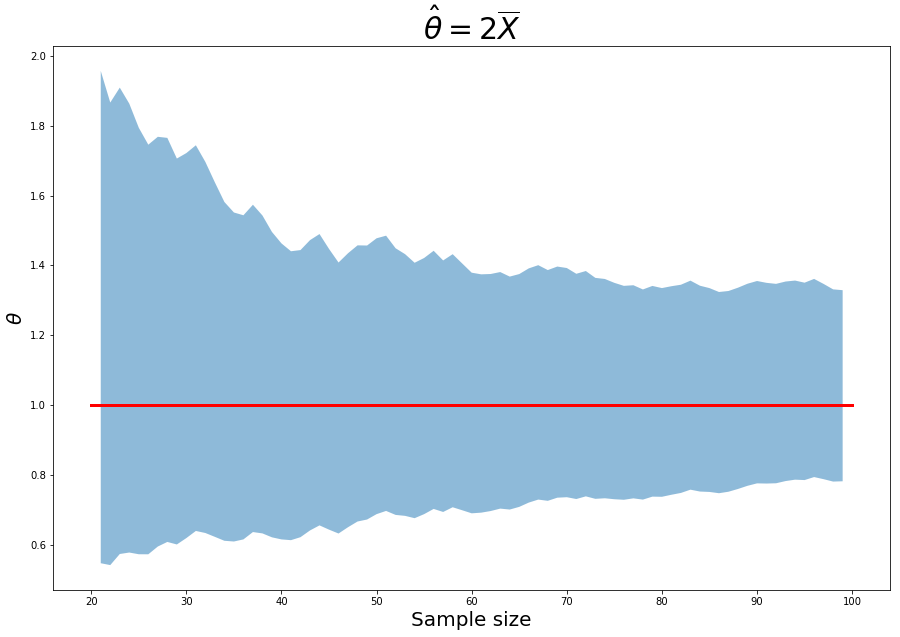

In [31]:
plt.fill_between(range(1, N), bounds2[0], bounds2[1], alpha='0.5')
plt.plot([0, N], [1, 1], linewidth=3., color='r')
plt.title(r'$\hat{\theta} = 2\overline{X}$', fontsize=30)
plt.xlabel(r'Sample size', fontsize=20)
plt.ylabel(r'$\theta$', fontsize=20)
plt.show()

plt.fill_between(range(1, N)[20:], bounds2[0][20:], bounds2[1][20:], alpha='0.5')
plt.plot([20, N], [1, 1], linewidth=3., color='r')
plt.title(r'$\hat{\theta} = 2\overline{X}$', fontsize=30)
plt.xlabel(r'Sample size', fontsize=20)
plt.ylabel(r'$\theta$', fontsize=20)
plt.show()

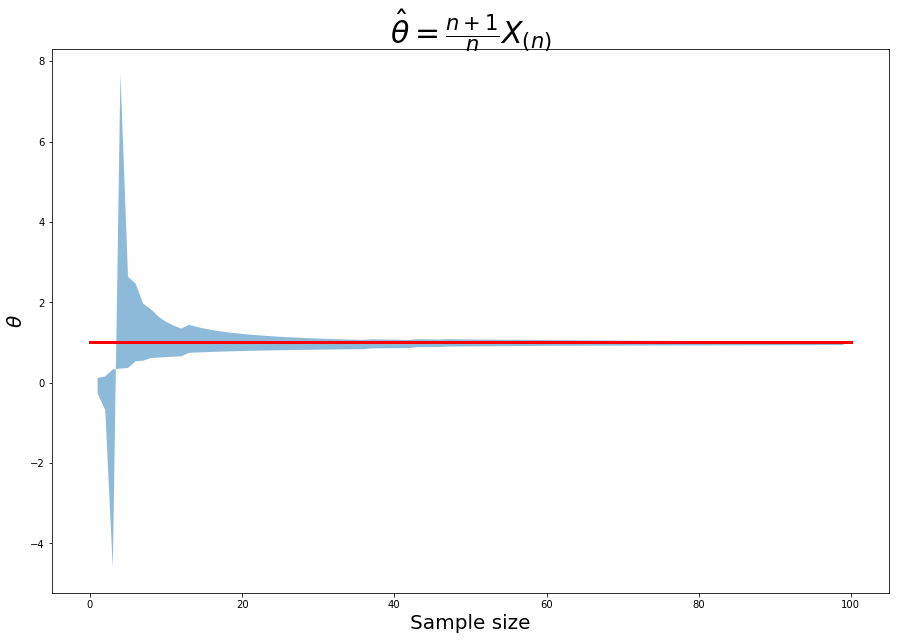

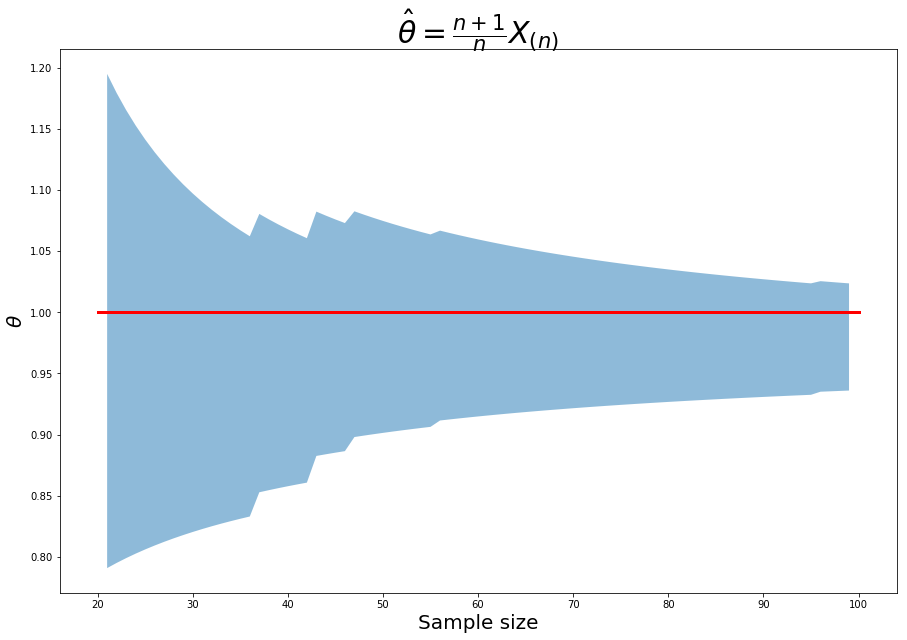

In [32]:
plt.fill_between(range(1, N), bounds3[0], bounds3[1], alpha='0.5')
plt.plot([0, N], [1, 1], linewidth=3., color='r')
plt.title(r'$\hat{\theta} = \frac{n+1}{n}X_{(n)}$', fontsize=30)
plt.xlabel(r'Sample size', fontsize=20)
plt.ylabel(r'$\theta$', fontsize=20)
plt.show()

plt.fill_between(range(1, N)[20:], bounds3[0][20:], bounds3[1][20:], alpha='0.5')
plt.plot([20, N], [1, 1], linewidth=3., color='r')
plt.title(r'$\hat{\theta} = \frac{n+1}{n}X_{(n)}$', fontsize=30)
plt.xlabel(r'Sample size', fontsize=20)
plt.ylabel(r'$\theta$', fontsize=20)
plt.show()

Выводы: <br>
 - первая оценка не является состоятельной, следовательно, не сходится к истинному значению параметра (что и видим на графике). <br>
 - вторая и третья оценки сходятся к истинному значению параметра при увеличении размеров выборки, но третья сходится быстрее. <br>
 
 ### Наилучшая оценка: $\frac{n+1}{n}X_{(n)}$

In [36]:
sample = np.random.poisson(size=N)
from scipy.stats import norm
def f4(row):
    n = len(row)
    est = np.mean(row)
    return est - norm.ppf(0.5*(1 + alpha))*np.sqrt(est/n), est - norm.ppf(0.5*(1 - alpha))*np.sqrt(est/n)
bounds4 = np.array([f4(sample[:n]) for n in range(1, N)]).transpose()

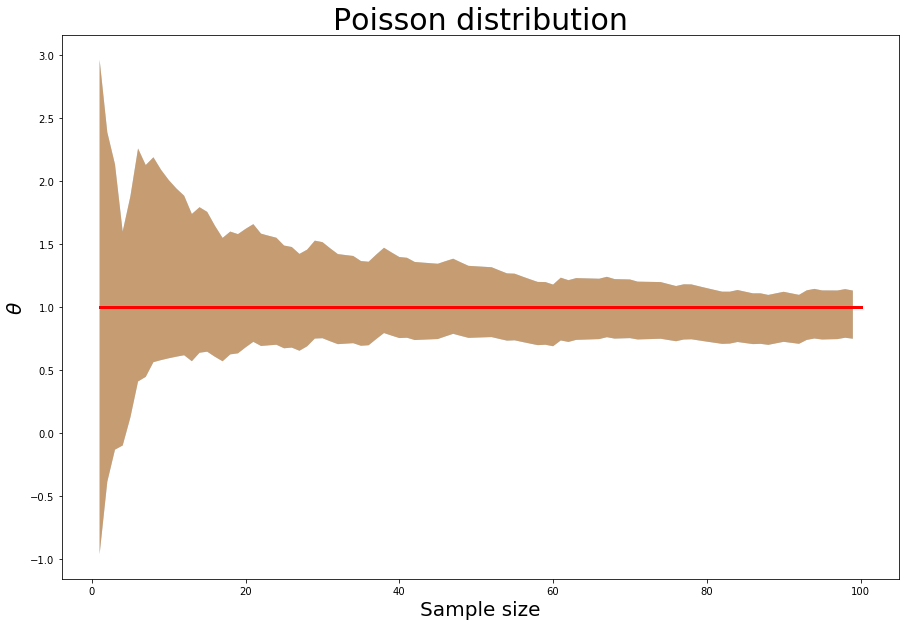

In [38]:
plt.fill_between(range(1, N), bounds4[0], bounds4[1], alpha=0.5)
plt.plot([1,N], [1,1], linewidth=3., color='r')
plt.title('Poisson distribution', fontsize=30)
plt.xlabel('Sample size', fontsize=20)
plt.ylabel(r'$\theta$', fontsize=20)
plt.show()

Вывод: оценка сходится к истинному значению параметра.